In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def inTypeAverage(Nodes, SelectedNodes, Data):
    '''Goal: finding the average value of in-type block of connection'''
    S = []
    for i in range(Nodes.index(SelectedNodes[0]), Nodes.index(SelectedNodes[-1])):
        for j in range(i+1, Nodes.index(SelectedNodes[-1])):
            S.append(Data[i][j])
    return sum(S)/len(S)



def newTypeData(Nodes, SelectedNodes, Data):
    '''Goad: return new Data matrix where we exclude low-weighted edges from selected nodes'''
    av = inTypeAverage(Nodes, SelectedNodes, Data)
    newData = Data.copy()
    acc = 0
    for i in range(0, len(SelectedNodes)):
        for j in range(i+1, len(SelectedNodes)):
            u = Nodes.index(SelectedNodes[i])
            v = Nodes.index(SelectedNodes[j])
            if Data[u][v]<= av:
                acc+=1
                newData[u][v]=0
                newData[v][u]=0
    print(f'number of items below {av}: {acc}')
    return newData

def heatmap(A, caption):
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (0.5, 'blue'), (1, 'red')])
    # plt.figure(figsize=(8, 8))  # Adjust the figsize as needed

    plt.imshow(A, cmap=cmap, interpolation='nearest')
    plt.colorbar()  # Add a colorbar to the heatmap
    plt.title(f'Heatmap for {caption}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the heatmap
    plt.show()    


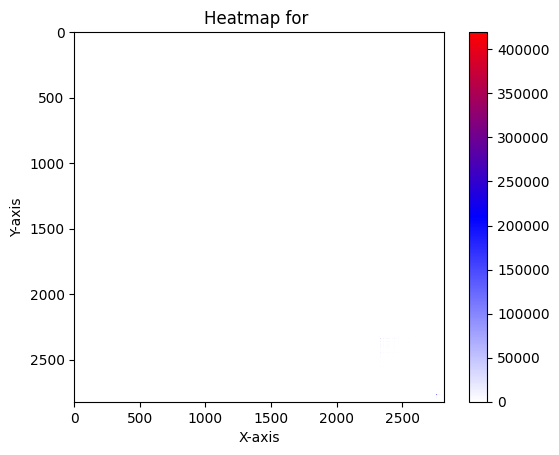

In [2]:
import extractingHG as exHG

Patients    = exHG.reading_pickle('Data/symmetricPath/patients.pickle')
Visits      = exHG.reading_pickle('Data/symmetricPath/visits.pickle')
Medications = exHG.reading_pickle('Data/symmetricPath/medication.pickle')
Diagnosis   = exHG.reading_pickle('Data/symmetricPath/diagnosis.pickle')
Procedures  = exHG.reading_pickle('Data/symmetricPath/procedures.pickle')

# Reading the metapath (pathsim-based) overall similarity matrix
data        = exHG.reading_pickle('Data/symmetricPath/data.pickle')
heatmap(data, "")

In [3]:
Nodes = Patients + Visits + Medications + Diagnosis + Procedures
len(Nodes)

2821

number of items below 363.54897445618985: 77506


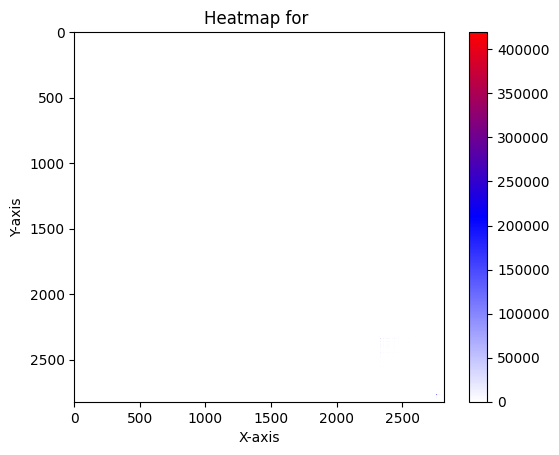

In [4]:
# data = newTypeData(Nodes, Patients, data)
# data = newTypeData(Nodes, Visits, data)
data = newTypeData(Nodes, Diagnosis, data)
# data = newTypeData(Nodes, Medications, data)
# data = newTypeData(Nodes, Procedures, data)

heatmap(data, '')


In [5]:
data[:10, :10]

array([[ 5. ,  6. ,  2. ,  7. ,  3. ,  4. ,  2. ,  2.5,  3.5,  3. ],
       [ 6. , 11. ,  4. , 13. ,  4. ,  6. ,  4. ,  5. ,  6. ,  6. ],
       [ 2. ,  4. ,  6. ,  4. ,  1. ,  2. ,  1.5,  2. ,  1.5,  3. ],
       [ 7. , 13. ,  4. , 63. ,  3.5, 13. ,  4. ,  5.5,  5. , 22. ],
       [ 3. ,  4. ,  1. ,  3.5,  6.5,  3. ,  2. ,  5. ,  5. ,  3. ],
       [ 4. ,  6. ,  2. , 13. ,  3. ,  6. ,  2. ,  3. ,  2. ,  3. ],
       [ 2. ,  4. ,  1.5,  4. ,  2. ,  2. ,  2.5,  1. ,  3. ,  2. ],
       [ 2.5,  5. ,  2. ,  5.5,  5. ,  3. ,  1. ,  8. ,  3. ,  3. ],
       [ 3.5,  6. ,  1.5,  5. ,  5. ,  2. ,  3. ,  3. ,  9. ,  3.5],
       [ 3. ,  6. ,  3. , 22. ,  3. ,  3. ,  2. ,  3. ,  3.5, 13.5]])

In [6]:
for i in range(len(Nodes)):
    for j in range(len(Nodes)):
        if data[i][j]>150:
            print(Nodes[i], Nodes[j], data[i][j])

D_198.0 D_198.0 30953.666666666668
D_198.0 D_162.0 95686.33333333333
D_198.0 D_531.0 1186.5
D_198.0 D_276.0 27637.0
D_198.0 D_428.0 23203.0
D_198.0 D_780.0 13894.5
D_198.0 D_272.0 24962.0
D_198.0 D_401.0 37955.333333333336
D_198.0 D_431.0 2113.5
D_198.0 D_486.0 24432.0
D_198.0 D_V15 20950.0
D_198.0 D_783.0 1773.0
D_198.0 D_255.0 3669.0
D_198.0 D_427.0 39459.333333333336
D_198.0 D_415.0 5257.333333333333
D_198.0 D_196.0 18156.333333333332
D_198.0 D_453.0 8600.5
D_198.0 D_423.0 6945.0
D_198.0 D_289.0 1501.0
D_198.0 D_346.0 702.0
D_198.0 D_V10 14758.666666666666
D_198.0 D_518.0 52581.333333333336
D_198.0 D_284.0 5320.0
D_198.0 D_V87 2689.6666666666665
D_198.0 D_458.0 13291.333333333334
D_198.0 D_414.0 16618.0
D_198.0 D_V45 12131.666666666666
D_198.0 D_412.0 6663.5
D_198.0 D_440.0 2481.0
D_198.0 D_403.0 7811.666666666667
D_198.0 D_585.0 8110.0
D_198.0 D_433.0 1230.0
D_198.0 D_274.0 4889.0
D_198.0 D_725.0 849.5
D_198.0 D_562.0 2743.0
D_198.0 D_V58 8571.0
D_198.0 D_788.0 8026.5
D_198.0 D_V66